# Tune the best k of a kNN classifier by cross-validation

In [ ]:
# A Python Library for Data Manipulation

import pandas as pd

# Loading the Dataset

data_path = '/content/drive/MyDrive/First_Semester_Projects/ML Project/waveform.data'
data = pd.read_csv(data_path, header=None, sep=',')

In [ ]:
# Display the first few rows of the dataset to understand its structure

data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [ ]:
# Getting Familiar with dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 non-null   int64  
dtype

In [ ]:
# To view some statistical overview of the dataset

data.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378,1.007800
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064,0.818946
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000,0.000000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000,0.000000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000,1.000000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000,2.000000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000,2.000000


In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]  # All columns except the last one are features
y = data.iloc[:, -1]   # The last column is the label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of 'k' values to try
k_values = range(1, 70)

# Initialize lists to store results
mean_accuracies = []
std_deviations = []

# Loop over each 'k' value to perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation
    scores = cross_val_score(knn, X, y, cv=5)

    # Calculate mean accuracy and standard deviation
    mean_accuracies.append(scores.mean())
    std_deviations.append(scores.std())

# Creating a DataFrame for the results table
results_df = pd.DataFrame({
    'k Value': k_values,
    'Mean Accuracy (%)': np.array(mean_accuracies) * 100,
    'Standard Deviation (%)': np.array(std_deviations) * 100
})

In [ ]:
# Display the results table
print(results_df)

    k Value  Mean Accuracy (%)  Standard Deviation (%)
0         1              77.96                2.528715
1         2              77.28                2.098952
2         3              81.06                1.868261
3         4              80.68                1.665413
4         5              81.98                1.793767
..      ...                ...                     ...
64       65              85.72                0.676461
65       66              85.70                0.695701
66       67              85.62                0.778203
67       68              85.78                0.633719
68       69              85.62                0.711056

[69 rows x 3 columns]


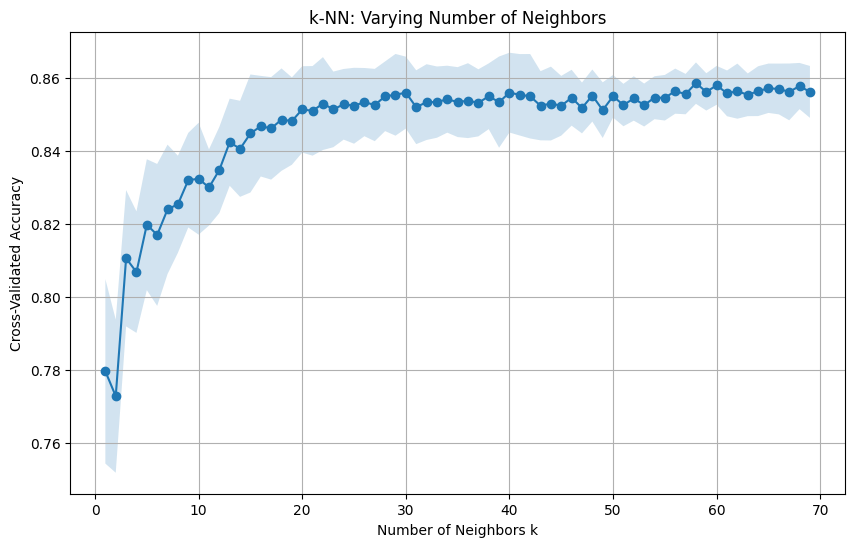

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.fill_between(k_values, np.array(mean_accuracies) - np.array(std_deviations),
                 np.array(mean_accuracies) + np.array(std_deviations), alpha=0.2)
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Identifying the 'k' value with the highest accuracy
optimal_k = k_values[np.argmax(mean_accuracies)]
print(optimal_k)

58


In [ ]:
# Now Training the kNN model using best optimal value of the k

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=58)

In [ ]:
from sklearn.metrics import accuracy_score

# Checking Accuracy of kNN model on the test dataset
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("----------------------")

# Generating Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix: \n", conf_matrix)

print("----------------------")

# Checking Precision, recall and F1-score of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


Accuracy: 0.859
----------------------
Confusion Matrix: 
 [[248  47  38]
 [ 14 323  17]
 [ 10  15 288]]
----------------------
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       333
           1       0.84      0.91      0.87       354
           2       0.84      0.92      0.88       313

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



# Reduce the complexity by running the Data Reduction algorithms studied in class on the training data. Compare the accuracy (with a 1NN) on the 1000 test waves before and after reduction of the training set.

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

# Initialize the CNN object
cnn = CondensedNearestNeighbour(n_neighbors=1)

# Fit the model and reduce the training data
X_train_reduced, y_train_reduced = cnn.fit_resample(X_train, y_train)
print(f"Number of examples in the original training set: {len(X_train)}")
print(f"Number of examples in the reduced training set: {len(X_train_reduced)}")

Number of examples in the original training set: 4000
Number of examples in the reduced training set: 1834


In [ ]:
# Classifier using the original training data
knn_original = KNeighborsClassifier(n_neighbors=1)
knn_original.fit(X_train, y_train)
original_accuracy = knn_original.score(X_test, y_test)
print("Accuracy with original training data:", original_accuracy)

# Classifier using the reduced training data from CNN
knn_reduced = KNeighborsClassifier(n_neighbors=1)
knn_reduced.fit(X_train_reduced, y_train_reduced)
reduced_accuracy = knn_reduced.score(X_test, y_test)
print("Accuracy with reduced training data:", reduced_accuracy)



Accuracy with original training data: 0.79
Accuracy with reduced training data: 0.739


In [ ]:
from sklearn.decomposition import PCA

# PCA to reduce the dimensionality of the training set
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)

# Fit the classifier on the reduced training set and evaluate on the test set
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(pca.transform(X_test))
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy on the test set after PCA: {acc_pca:.4f}")

Accuracy on the test set after PCA: 0.8800


# Using the original dataset, compare (in terms of time) the two methods studied in class for speeding-up the calculation of the 1NN with a brute force 1NN algorithm

In [ ]:
def brute_force_1nn(data, predict):
    min_dist = np.inf
    label = None
    # Loop through the data
    for row in data:
        x = row[:-1]
        y = row[-1]
        # Compute the Euclidean distance between the predict point and the data point
        dist = np.linalg.norm(predict - x)
        # If this distance is smaller than the previous minimum, update min_dist and label
        if dist < min_dist:
            min_dist = dist
            label = y
    return label

In [ ]:
def data_reduction(data, k=1, max_iterations=100, verbose=False):
    # Randomly shuffle the data to ensure randomness in selection.
    np.random.shuffle(data)

    # Initialize storage with the first data point and an empty dustbin.
    storage = [data[0]]
    dustbin = []

    # Iterate through the data to refine the storage set.
    for iteration in range(max_iterations):
        # Flag to check if any changes were made in this iteration.
        changed = False
        # Temporary list to hold new storage candidates.
        new_storage = []

        # Iterate through each data point after the first (already in storage).
        for x in data[1:]:
            # Predict the class of the current data point using k-nearest neighbors.
            y = k_nearest_neighbors(np.array(storage), x[:-1], k=k)

            # If the prediction does not match the actual label, it's a potential candidate for storage.
            if y != x[-1]:
                new_storage.append(x)
                changed = True  # Mark that a change was made.
            else:
                # If correctly classified, move it to the dustbin.
                dustbin.append(x)

        # If verbose is set to True, print the status after each iteration.
        if verbose:
            print(f"Iteration {iteration}: Storage size={len(new_storage)}, Dustbin size={len(dustbin)}")

        # If no changes were made, the storage set is stable and we can stop the process.
        if not changed:
            break

        # Update the storage with the new candidates.
        storage = new_storage
        # Reset the data to be the combination of new storage and dustbin for the next iteration.
        data = new_storage + dustbin
        # Clear the dustbin for the next iteration.
        dustbin = []

        # Early exit if storage is empty to prevent unnecessary iterations.
        if not storage:
            if verbose:
                print("Warning: Storage is empty. Exiting early.")
            break

    # Return the refined storage as a numpy array.
    return np.array(storage)


In [ ]:
from scipy import spatial
from sklearn.neighbors import KDTree
from scipy.stats import mode

def k_nearest_neighbors(data, predict, k=1):
    # Check if data is empty
    if data.shape[0] == 0:
        print("Data array is empty. No neighbors to find.")
        # Handle the empty case appropriately. For example, return None or raise an error.
        return None

    # Ensure predict is a 2D array. Reshape if it's not.
    if predict.ndim == 1:
        predict = predict.reshape(1, -1)

    # Create a KD-tree from the data
    tree = KDTree(data[:, :-1])

    # Query the tree for the k nearest neighbors of the predict point
    dist, ind = tree.query(predict, k=k)

    # Get the labels of the neighbors
    labels = data[ind, -1]

    # Find the most common label
    vote = mode(labels, axis=1)[0].ravel()

    # Return the vote
    return vote


In [ ]:
# Apply the data reduction to the train set
train_reduced = data_reduction(np.c_[X_train, y_train])

In [ ]:
import time


# Measure the time of the brute force 1NN on the test set using the original train set
start = time.time()
y_pred_bf = [brute_force_1nn(np.c_[X_train, y_train], x) for x in X_test]
end = time.time()
time_bf = end - start
print(f"Brute force 1NN took {time_bf} seconds")


# Measure the time of the brute force 1NN on the test set using the reduced train set
start = time.time()
y_pred_bf_red = [brute_force_1nn(np.c_[train_reduced], x) for x in X_test]
end = time.time()
time_bf_red = end - start
print(f"Time of brute force 1NN with data reduction: {time_bf_red:.4f} seconds")

# Measure the time of the k-nearest neighbors using KD-trees on the test set using the original train set
start = time.time()
y_pred_kd = k_nearest_neighbors(np.c_[X_train, y_train], X_test, k=1)
end = time.time()
time_kd = end - start
print(f"Time of k-nearest neighbors using KD-trees: {time_kd:.4f} seconds")

# Measure the time of the k-nearest neighbors using KD-trees on the test set using the reduced train set
start = time.time()
y_pred_kd_red = k_nearest_neighbors(train_reduced, X_test, k=1)
end = time.time()
time_kd_red = end - start
print(f"Time of k-nearest neighbors using KD-trees with data reduction: {time_kd_red:.4f} seconds")


Brute force 1NN took 0.48778414726257324 seconds
Time of brute force 1NN with data reduction: 0.1931 seconds
Time of k-nearest neighbors using KD-trees: 0.2038 seconds
Time of k-nearest neighbors using KD-trees with data reduction: 0.0957 seconds


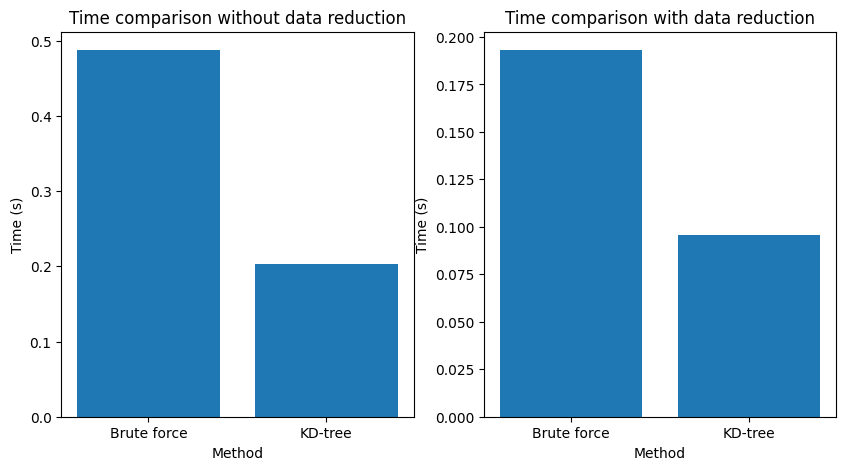

In [ ]:
# Plot the time comparison of the brute force 1NN and the k-nearest neighbors using KD-trees
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['Brute force', 'KD-tree'], [np.mean(time_bf), np.mean(time_kd)])
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.title('Time comparison without data reduction')
plt.subplot(1, 2, 2)
plt.bar(['Brute force', 'KD-tree'], [np.mean(time_bf_red), np.mean(time_kd_red)])
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.title('Time comparison with data reduction')
plt.show()

#Generate artificially imbalancy in the training data and analyze the impact on the accuracy on the 1000 test waves. Tune k w.r.t. the F-measure and compare the performance with the accuracy.

In [ ]:
from sklearn.utils import resample
from collections import Counter

# Analyze the original class distribution
original_class_distribution = Counter(y_train)
print("Original class distribution:", original_class_distribution)

# Define your desired imbalance in the dataset
artificial_imb = {0: 600, 1: 1000, 2: 1383}  # Adjust as needed

# Create an empty list to hold the resampled datasets
resampled_data = []

# Resample each class in the training set
for class_value, num_samples in artificial_imb.items():
    X_class = X_train[y_train == class_value]
    y_class = y_train[y_train == class_value]
    X_res, y_res = resample(X_class, y_class, replace=False, n_samples=num_samples, random_state=42)
    resampled_data.append((X_res, y_res))

# Combine the resampled classes back into a single dataset
X_train_imb = np.vstack([x for x, y in resampled_data])
y_train_imb = np.hstack([y for x, y in resampled_data])

# Analyze the new class distribution after introducing imbalance
imb_class_distribution = Counter(y_train_imb)
print("Class distribution after introducing imbalance:", imb_class_distribution)

Original class distribution: Counter({2: 1383, 0: 1324, 1: 1293})
Class distribution after introducing imbalance: Counter({2: 1383, 1: 1000, 0: 600})


In [ ]:
from sklearn.metrics import f1_score

# Train and evaluate with the imbalanced dataset
knn_imb = KNeighborsClassifier(n_neighbors=1)
knn_imb.fit(X_train_imb, y_train_imb)
y_pred_imb = knn_imb.predict(X_test)
acc_imb = accuracy_score(y_test, y_pred_imb)
f1_imb = f1_score(y_test, y_pred_imb, average='weighted')
print(f"Accuracy after introducing imbalance: {acc_imb:.4f}")
print(f"F1 score after introducing imbalance: {f1_imb:.4f}")

Accuracy after introducing imbalance: 0.7860
F1 score after introducing imbalance: 0.7832


In [ ]:
# Tune k w.r.t. the F-measure with the imbalanced dataset
best_k = 0
best_f1_imb = 0
best_acc_imb = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_imb, y_train_imb)
    y_pred_k = knn.predict(X_test)
    acc_k = accuracy_score(y_test, y_pred_k)
    f1_k = f1_score(y_test, y_pred_k, average='weighted')

    if f1_k > best_f1_imb:
        best_k = k
        best_f1_imb = f1_k
        best_acc_imb = acc_k

In [ ]:
# Display the best results with the imbalanced dataset
print(f"Best k with imbalanced data: {best_k}")
print(f"Best F1 score with imbalanced data: {best_f1_imb:.4f}")
print(f"Best Accuracy with imbalanced data: {best_acc_imb:.4f}")


Best k with imbalanced data: 10
Best F1 score with imbalanced data: 0.8338
Best Accuracy with imbalanced data: 0.8370
